In [2]:
%load_ext lab_black

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.axis as ax
from pywaffle import Waffle
import datetime

%matplotlib inline

In [4]:
path1 = "./"
path2 = "./"
filename1 = "All_Data_Original_magazine.csv"
filename2 = "All_Data_Original_weibo.csv"

mg_ori = pd.read_csv(path1 + filename1)
wb_ori = pd.read_csv(path2 + filename2)

## clean data

In [5]:
df_mg_ori = pd.DataFrame(mg_ori)
df_mg_ori = (
    df_mg_ori.dropna(axis=1, how="all")  # drop all-null columns
    .dropna(axis=0, how="any")  # drop rows with any null
    .drop(["ip", "browser", "os"], axis=1)  # these three columns are useless
)
df_mg = df_mg_ori[0:100]
df_mg.columns = [
    "seq",
    "start",
    "finish",
    "status",
    "Q1",
    "Q2",
    "Q3",
    "Q4",
    "Q5",
    "Q6",
    "Q7",
]

df_mg.reset_index(inplace=True, drop=True)
# to avoid any break index(since we dropped rows with null), to reset index is necessary.
# Without inplace=True, index won't be changed;
# without drop=True, there will be a redundant index column

df_mg

,seq,start,finish,status,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,1,2019-12-12 18:48:14,2019-12-12 18:49:01,1,1,22,2,2,1,10.0,4.0
1,2,2019-12-12 20:13:19,2019-12-12 20:14:45,1,2,22,1,2,1,0.0,0.0
2,3,2019-12-12 21:13:48,2019-12-12 21:14:51,1,2,22,3,2,1,9.0,9.0
3,4,2019-12-12 21:15:54,2019-12-12 21:17:28,1,2,23,1,2,1,9.0,9.0
4,5,2019-12-12 21:16:45,2019-12-12 21:17:46,1,2,19,4,2,4,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
95,96,2019-12-12 22:22:11,2019-12-12 22:24:12,1,2,24,2,2,1,5.0,5.0
96,97,2019-12-12 22:27:14,2019-12-12 22:27:45,1,1,25,1,2,1,3.0,0.0
97,98,2019-12-12 22:27:53,2019-12-12 22:28:47,1,2,25,1,2,1,0.0,5.0
98,99,2019-12-12 22:29:43,2019-12-12 22:30:45,1,2,23,1,2,1,8.0,7.0


In [6]:
df_wb_ori = pd.DataFrame(wb_ori)
df_wb_ori = (
    df_wb_ori.dropna(axis=1, how="all")
    .dropna(axis=0, how="any")
    .drop(["ip", "browser", "os"], axis=1)
)  #
# print(df_wb_ori[0])
df_wb = df_wb_ori[0:100]
df_wb.columns = [
    "seq",
    "start",
    "finish",
    "status",
    "Q1",
    "Q2",
    "Q3",
    "Q4",
    "Q5",
    "Q6",
    "Q7",
]
df_wb.reset_index(inplace=True, drop=True)

df_wb

,seq,start,finish,status,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,2,2019-12-12 20:26:41,2019-12-12 20:27:29,1,1,22,2,3.0,1,10.0,4.0
1,3,2019-12-12 21:15:27,2019-12-12 21:16:22,1,2,23,1,3.0,4,3.0,5.0
2,4,2019-12-12 21:15:57,2019-12-12 21:17:26,1,2,23,2,3.0,2,6.0,5.0
3,5,2019-12-12 21:17:23,2019-12-12 21:18:07,1,2,18,1,3.0,2,5.0,3.0
4,6,2019-12-12 21:17:08,2019-12-12 21:18:37,1,2,20,1,3.0,2,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
95,97,2019-12-12 21:59:34,2019-12-12 22:00:51,1,2,22,1,3.0,2,6.0,5.0
96,98,2019-12-12 22:00:39,2019-12-12 22:01:55,1,2,22,1,3.0,2,2.0,3.0
97,99,2019-12-12 22:00:38,2019-12-12 22:01:59,1,2,23,3,3.0,2,3.0,4.0
98,100,2019-12-12 22:00:39,2019-12-12 22:02:31,1,2,23,1,3.0,2,5.0,2.0


In [7]:
# count the amount of each option
mg_Q3_1 = [item for item in df_mg["Q3"] if item == 1]
mg_Q3_1_freq = sum(mg_Q3_1) / 1
mg_Q3_2 = [item for item in df_mg["Q3"] if item == 2]
mg_Q3_2_freq = sum(mg_Q3_2) / 2
mg_Q3_3 = [item for item in df_mg["Q3"] if item == 3]
mg_Q3_3_freq = sum(mg_Q3_3) / 3
mg_Q3_4 = [item for item in df_mg["Q3"] if item == 4]
mg_Q3_4_freq = sum(mg_Q3_4) / 4

## show data: distribution of different options

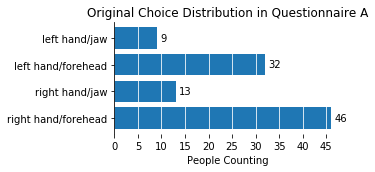

In [11]:
plt.figure(figsize=[5, 2.5])
plt.title("Original Choice Distribution in Questionnaire A")
plt.xlabel("People Counting")
plt.grid(axis="x", c="w")
ax = plt.gca()
ax.spines["top"].set_visible(False)  # erase top frame
ax.spines["bottom"].set_visible(False)  # erase bottom frame
ax.spines["right"].set_visible(False)  # erase fight frame

for x, y in zip([mg_Q3_1_freq, mg_Q3_2_freq, mg_Q3_3_freq, mg_Q3_4_freq], [1, 2, 3, 4]):
    plt.text(x + 0.8, y - 1.1, "%.0f" % x)
plt.barh(
    ["right hand/forehead", "right hand/jaw", "left hand/forehead", "left hand/jaw"],
    [mg_Q3_1_freq, mg_Q3_2_freq, mg_Q3_3_freq, mg_Q3_4_freq],
)
top = int(max(mg_Q3_1_freq, mg_Q3_2_freq, mg_Q3_3_freq, mg_Q3_4_freq))
ax.set_xticks(range(0, top, 5))
plt.show()

In [9]:
mg_Q5_1 = [item for item in df_mg["Q5"] if item == 1]
mg_Q5_1_freq = sum(mg_Q5_1) / 1
mg_Q5_2 = [item for item in df_mg["Q5"] if item == 2]
mg_Q5_2_freq = sum(mg_Q5_2) / 2
mg_Q5_3 = [item for item in df_mg["Q5"] if item == 3]
mg_Q5_3_freq = sum(mg_Q5_3) / 3
mg_Q5_4 = [item for item in df_mg["Q5"] if item == 4]
mg_Q5_4_freq = sum(mg_Q5_4) / 4

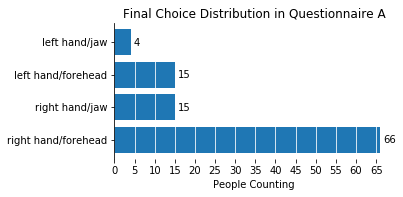

In [91]:
plt.figure(figsize=[5, 2.5])
plt.title("Final Choice Distribution in Questionnaire A")
plt.xlabel("People Counting")
plt.grid(axis="x", c="w")
ax = plt.gca()
ax.spines["top"].set_visible(False)  # erase top frame
ax.spines["bottom"].set_visible(False)  # erase bottom frame
ax.spines["right"].set_visible(False)  # erase fight frame
for x, y in zip([mg_Q5_1_freq, mg_Q5_2_freq, mg_Q5_3_freq, mg_Q5_4_freq], [1, 2, 3, 4]):
    plt.text(x + 0.8, y - 1.1, "%.0f" % x)
plt.barh(
    ["right hand/forehead", "right hand/jaw", "left hand/forehead", "left hand/jaw"],
    [mg_Q5_1_freq, mg_Q5_2_freq, mg_Q5_3_freq, mg_Q5_4_freq],
)
top = int(max(mg_Q5_1_freq, mg_Q5_2_freq, mg_Q5_3_freq, mg_Q5_4_freq))
ax.set_xticks(range(0, top, 5))
#plt.savefig("Final Choice Distribution in Questionnaire A.png")
plt.show()

In [10]:
wb_Q3_1 = [item for item in df_wb["Q3"] if item == 1]
wb_Q3_1_freq = sum(wb_Q3_1) / 1
wb_Q3_2 = [item for item in df_wb["Q3"] if item == 2]
wb_Q3_2_freq = sum(wb_Q3_2) / 2
wb_Q3_3 = [item for item in df_wb["Q3"] if item == 3]
wb_Q3_3_freq = sum(wb_Q3_3) / 3
wb_Q3_4 = [item for item in df_wb["Q3"] if item == 4]
wb_Q3_4_freq = sum(wb_Q3_4) / 4

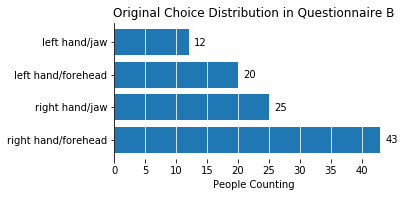

In [92]:
plt.figure(figsize=[5, 2.5])
plt.title("Original Choice Distribution in Questionnaire B")
plt.xlabel("People Counting")
plt.grid(axis="x", c="w")
ax = plt.gca()
ax.spines["top"].set_visible(False)  # erase top frame
ax.spines["bottom"].set_visible(False)  # erase bottom frame
ax.spines["right"].set_visible(False)  # erase fight frame
for x, y in zip([wb_Q3_1_freq, wb_Q3_2_freq, wb_Q3_3_freq, wb_Q3_4_freq], [1, 2, 3, 4]):
    plt.text(x + 0.8, y - 1.1, "%.0f" % x)
plt.barh(
    ["right hand/forehead", "right hand/jaw", "left hand/forehead", "left hand/jaw"],
    [wb_Q3_1_freq, wb_Q3_2_freq, wb_Q3_3_freq, wb_Q3_4_freq],
)
top = int(max(wb_Q3_1_freq, wb_Q3_2_freq, wb_Q3_3_freq, wb_Q3_4_freq))
ax.set_xticks(range(0, top, 5))
#plt.savefig("Original Choice Distribution in Questionnaire B.png")
plt.show()

In [12]:
wb_Q5_1 = [item for item in df_wb["Q5"] if item == 1]
wb_Q5_1_freq = sum(wb_Q5_1) / 1
wb_Q5_2 = [item for item in df_wb["Q5"] if item == 2]
wb_Q5_2_freq = sum(wb_Q5_2) / 2
wb_Q5_3 = [item for item in df_wb["Q5"] if item == 3]
wb_Q5_3_freq = sum(wb_Q5_3) / 3
wb_Q5_4 = [item for item in df_wb["Q5"] if item == 4]
wb_Q5_4_freq = sum(wb_Q5_4) / 4

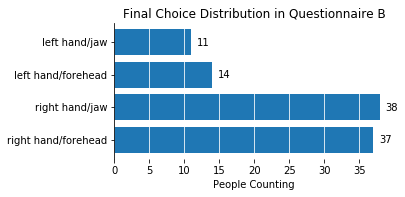

In [93]:
plt.figure(figsize=[5, 2.5])
plt.title("Final Choice Distribution in Questionnaire B")
plt.xlabel("People Counting")
plt.grid(axis="x", c="w")
ax = plt.gca()
ax.spines["top"].set_visible(False)  # erase top frame
ax.spines["bottom"].set_visible(False)  # erase bottom frame
ax.spines["right"].set_visible(False)  # erase fight frame
for x, y in zip([wb_Q5_1_freq, wb_Q5_2_freq, wb_Q5_3_freq, wb_Q5_4_freq], [1, 2, 3, 4]):
    plt.text(x + 0.8, y - 1.1, "%.0f" % x)
plt.barh(
    ["right hand/forehead", "right hand/jaw", "left hand/forehead", "left hand/jaw"],
    [wb_Q5_1_freq, wb_Q5_2_freq, wb_Q5_3_freq, wb_Q5_4_freq],
)
top = int(max(wb_Q5_1_freq, wb_Q5_2_freq, wb_Q5_3_freq, wb_Q5_4_freq))
ax.set_xticks(range(0, top, 5))
#plt.savefig("Final Choice Distribution in Questionnaire B.png")
plt.show()

## for H3: choice flow using Sankey plot

In [14]:
df_mg_change = zip(df_mg["Q3"], df_mg["Q5"])

In [15]:
mg11, mg12, mg13, mg14, mg21, mg22, mg23, mg24, mg31, mg32, mg33, mg34, mg41, mg42, mg43, mg44 = (
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
)
for p, q in df_mg_change:
    if p == 1 and q == 1:
        mg11 += 1
    if p == 1 and q == 2:
        mg12 += 1
    if p == 1 and q == 3:
        mg13 += 1
    if p == 1 and q == 4:
        mg14 += 1
    if p == 2 and q == 1:
        mg21 += 1
    if p == 2 and q == 2:
        mg22 += 1
    if p == 2 and q == 3:
        mg23 += 1
    if p == 2 and q == 4:
        mg24 += 1
    if p == 3 and q == 1:
        mg31 += 1
    if p == 3 and q == 2:
        mg32 += 1
    if p == 3 and q == 3:
        mg33 += 1
    if p == 3 and q == 4:
        mg34 += 1
    if p == 4 and q == 1:
        mg41 += 1
    if p == 4 and q == 2:
        mg42 += 1
    if p == 4 and q == 3:
        mg43 += 1
    if p == 4 and q == 4:
        mg44 += 1

In [16]:
from pyecharts.globals import CurrentConfig, NotebookType

CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

import json
import os

from pyecharts import options as opts
from pyecharts.charts import Page, Sankey


def sankey_mg() -> Sankey:
    nodes = [
        {"name": "original: right hand/ forehead"},
        {"name": "original: right hand/ jaw"},
        {"name": "original: left hand/ forehead"},
        {"name": "original: left hand/ jaw"},
        {"name": "final: right hand/ forehead"},
        {"name": "final: right hand/ jaw"},
        {"name": "final: left hand/ forehead"},
        {"name": "final: left hand/ jaw"},
    ]

    links = [
        {
            "source": "original: right hand/ forehead",
            "target": "final: right hand/ forehead",
            "value": mg11,
        },
        {
            "source": "original: right hand/ forehead",
            "target": "final: right hand/ jaw",
            "value": mg12,
        },
        {
            "source": "original: right hand/ forehead",
            "target": "final: left hand/ forehead",
            "value": mg13,
        },
        {
            "source": "original: right hand/ forehead",
            "target": "final: left hand/ jaw",
            "value": mg14,
        },
        {
            "source": "original: right hand/ jaw",
            "target": "final: right hand/ forehead",
            "value": mg21,
        },
        {
            "source": "original: right hand/ jaw",
            "target": "final: right hand/ jaw",
            "value": mg22,
        },
        {
            "source": "original: right hand/ jaw",
            "target": "final: left hand/ forehead",
            "value": mg23,
        },
        {
            "source": "original: right hand/ jaw",
            "target": "final: left hand/ jaw",
            "value": mg24,
        },
        {
            "source": "original: left hand/ forehead",
            "target": "final: right hand/ forehead",
            "value": mg31,
        },
        {
            "source": "original: left hand/ forehead",
            "target": "final: right hand/ jaw",
            "value": mg32,
        },
        {
            "source": "original: left hand/ forehead",
            "target": "final: left hand/ forehead",
            "value": mg33,
        },
        {
            "source": "original: left hand/ forehead",
            "target": "final: left hand/ jaw",
            "value": mg34,
        },
        {
            "source": "original: left hand/ jaw",
            "target": "final: right hand/ forehead",
            "value": mg41,
        },
        {
            "source": "original: left hand/ jaw",
            "target": "final: right hand/ jaw",
            "value": mg42,
        },
        {
            "source": "original: left hand/ jaw",
            "target": "final: left hand/ forehead",
            "value": mg43,
        },
        {
            "source": "original: left hand/ jaw",
            "target": "final: left hand/ jaw",
            "value": mg44,
        },
    ]
    c = (
        Sankey()
        .add(
            "sankey",
            nodes,
            links,
            linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source"),
            label_opts=opts.LabelOpts(position="right"),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Choice Flow in Questionnaire A")
        )
    )

    return c

In [17]:
sankey_mg().load_javascript()

In [18]:
sankey_mg().render_notebook()  # above two lines are used to render sankey plot inline.

In [19]:
df_wb_change = zip(df_wb["Q3"], df_wb["Q5"])

In [20]:
wb11, wb12, wb13, wb14, wb21, wb22, wb23, wb24, wb31, wb32, wb33, wb34, wb41, wb42, wb43, wb44 = (
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
)
for p, q in df_wb_change:
    if p == 1 and q == 1:
        wb11 += 1
    if p == 1 and q == 2:
        wb12 += 1
    if p == 1 and q == 3:
        wb13 += 1
    if p == 1 and q == 4:
        wb14 += 1
    if p == 2 and q == 1:
        wb21 += 1
    if p == 2 and q == 2:
        wb22 += 1
    if p == 2 and q == 3:
        wb23 += 1
    if p == 2 and q == 4:
        wb24 += 1
    if p == 3 and q == 1:
        wb31 += 1
    if p == 3 and q == 2:
        wb32 += 1
    if p == 3 and q == 3:
        wb33 += 1
    if p == 3 and q == 4:
        wb34 += 1
    if p == 4 and q == 1:
        wb41 += 1
    if p == 4 and q == 2:
        wb42 += 1
    if p == 4 and q == 3:
        wb43 += 1
    if p == 4 and q == 4:
        wb44 += 1

In [21]:
from pyecharts.globals import CurrentConfig, NotebookType

CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

import json
import os

from pyecharts import options as opts
from pyecharts.charts import Page, Sankey


def sankey_wb() -> Sankey:
    nodes = [
        {"name": "original: right hand/ forehead"},
        {"name": "original: right hand/ jaw"},
        {"name": "original: left hand/ forehead"},
        {"name": "original: left hand/ jaw"},
        {"name": "final: right hand/ forehead"},
        {"name": "final: right hand/ jaw"},
        {"name": "final: left hand/ forehead"},
        {"name": "final: left hand/ jaw"},
    ]

    links = [
        {
            "source": "original: right hand/ forehead",
            "target": "final: right hand/ forehead",
            "value": wb11,
        },
        {
            "source": "original: right hand/ forehead",
            "target": "final: right hand/ jaw",
            "value": wb12,
        },
        {
            "source": "original: right hand/ forehead",
            "target": "final: left hand/ forehead",
            "value": wb13,
        },
        {
            "source": "original: right hand/ forehead",
            "target": "final: left hand/ jaw",
            "value": wb14,
        },
        {
            "source": "original: right hand/ jaw",
            "target": "final: right hand/ forehead",
            "value": wb21,
        },
        {
            "source": "original: right hand/ jaw",
            "target": "final: right hand/ jaw",
            "value": wb22,
        },
        {
            "source": "original: right hand/ jaw",
            "target": "final: left hand/ forehead",
            "value": wb23,
        },
        {
            "source": "original: right hand/ jaw",
            "target": "final: left hand/ jaw",
            "value": wb24,
        },
        {
            "source": "original: left hand/ forehead",
            "target": "final: right hand/ forehead",
            "value": wb31,
        },
        {
            "source": "original: left hand/ forehead",
            "target": "final: right hand/ jaw",
            "value": wb32,
        },
        {
            "source": "original: left hand/ forehead",
            "target": "final: left hand/ forehead",
            "value": wb33,
        },
        {
            "source": "original: left hand/ forehead",
            "target": "final: left hand/ jaw",
            "value": wb34,
        },
        {
            "source": "original: left hand/ jaw",
            "target": "final: right hand/ forehead",
            "value": wb41,
        },
        {
            "source": "original: left hand/ jaw",
            "target": "final: right hand/ jaw",
            "value": wb42,
        },
        {
            "source": "original: left hand/ jaw",
            "target": "final: left hand/ forehead",
            "value": wb43,
        },
        {
            "source": "original: left hand/ jaw",
            "target": "final: left hand/ jaw",
            "value": wb44,
        },
    ]
    c = (
        Sankey()
        .add(
            "sankey",
            nodes,
            links,
            linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source"),
            label_opts=opts.LabelOpts(position="right"),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Choice Flow in Questionnaire B")
        )
    )

    return c

In [22]:
sankey_wb().load_javascript()

In [23]:
sankey_wb().render_notebook()

## for H1: total change rate

In [24]:
change_rate_mg = 1 - (mg11 + mg22 + mg33 + mg44) / 100
print("%.2f" % change_rate_mg)

0.35


In [25]:
change_rate_wb = 1 - (wb11 + wb22 + wb33 + wb44) / 100
print("%.2f" % change_rate_wb)

0.43


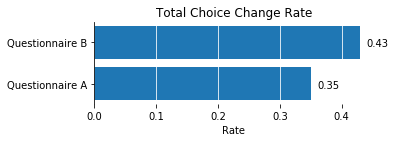

In [94]:
plt.figure(figsize=[5, 1.5])
plt.title("Total Choice Change Rate")
plt.xlabel("Rate")
plt.grid(axis="x", c="w")
ax = plt.gca()
ax.spines["top"].set_visible(False)  # erase top frame
ax.spines["bottom"].set_visible(False)  # erase bottom frame
ax.spines["right"].set_visible(False)  # erase fight frame
for x, y in zip([change_rate_mg, change_rate_wb], [1, 2]):
    plt.text(x + 0.01, y - 1.1, "%.2f" % x)
plt.barh(["Questionnaire A", "Questionnaire B"], [change_rate_mg, change_rate_wb])
top = max(change_rate_mg, change_rate_wb)
ax.set_xticks(np.arange(0, top, 0.1))
#plt.savefig("Total Choice Change Rate.png")
plt.show()

## for H4: option changes among genders

In [27]:
men_keep_mg, men_change_mg, women_keep_mg, women_change_mg = 0, 0, 0, 0

for gender, original, final in zip(df_mg["Q1"], df_mg["Q3"], df_mg["Q5"]):
    if gender == 1 and original == final:
        men_keep_mg += 1
    if gender == 1 and original != final:
        men_change_mg += 1
    if gender == 2 and original == final:
        women_keep_mg += 1
    if gender == 2 and original != final:
        women_change_mg += 1

In [28]:
men_keep_wb, men_change_wb, women_keep_wb, women_change_wb = 0, 0, 0, 0

for gender, original, final in zip(df_wb["Q1"], df_wb["Q3"], df_wb["Q5"]):
    if gender == 1 and original == final:
        men_keep_wb += 1
    if gender == 1 and original != final:
        men_change_wb += 1
    if gender == 2 and original == final:
        women_keep_wb += 1
    if gender == 2 and original != final:
        women_change_wb += 1

In [29]:
men_keep = men_keep_mg + men_keep_wb
men_change = men_change_mg + men_change_wb
women_keep = women_keep_mg + women_keep_wb
women_change = women_change_mg + women_change_wb

In [30]:
print(men_keep, men_change, women_keep, women_change)

36 20 86 58


In [31]:
# since the totals of men and women are different, we scale them to 100
men_change_scaled = men_change * 100 / (men_change + men_keep)
men_keep_scaled = 100 - men_change_scaled
women_change_scaled = women_change * 100 / (women_change + women_keep)
women_keep_scaled = 100 - women_change_scaled

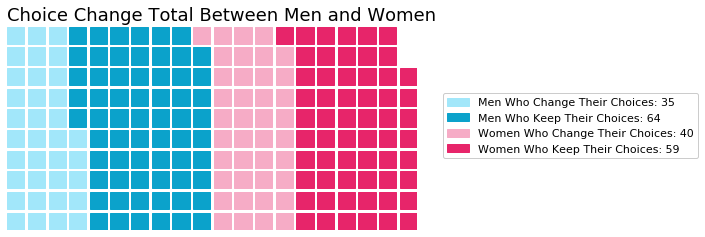

In [32]:
data = {
    "Men Who Change Their Choices": int(men_change_scaled),
    "Men Who Keep Their Choices": int(men_keep_scaled),
    "Women Who Change Their Choices": int(women_change_scaled),
    "Women Who Keep Their Choices": int(women_keep_scaled),
}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    figsize=(10, 15),
    values=data,
    colors=("#A2E7FA", "#0BA2CB", "#F6ACC6", "#E7256A"),
    title={
        "label": "Choice Change Total Between Men and Women",
        "loc": "left",
        "fontsize": 18,
        "fontstyle": "normal",
    },
    labels=["{0}: {1}".format(k, v) for k, v in data.items()],
    legend={
        "loc": "upper left",
        "fontsize": 11,
        "bbox_to_anchor": (1.05, 0.7),
        # "ncol": len(data),
        "framealpha": 1,
    },
)
fig.gca().set_facecolor("#FFFFFF")
fig.set_facecolor("#FFFFFF")
plt.show()

## for H2: change rate with different periods

In [33]:
# convert start time, finish time to datatime format
df_mg_start, df_mg_finish, period_mg = [], [], []
for i in range(len(df_mg["start"])):
    df_mg["start"][i] = df_mg["start"][i].strip("PM")
    df_mg_start.append(
        datetime.datetime.strptime(df_mg["start"][i], "%Y-%m-%d %H:%M:%S")
    )
for i in range(len(df_mg["finish"])):
    df_mg["finish"][i] = df_mg["finish"][i].strip("PM")
    df_mg_finish.append(
        datetime.datetime.strptime(df_mg["finish"][i], "%Y-%m-%d %H:%M:%S")
    )
# get time period of each person
for s, f in zip(df_mg_start, df_mg_finish):
    period_mg.append((f - s).total_seconds())

print(period_mg)

[47.0, 86.0, 63.0, 94.0, 61.0, 61.0, 89.0, 47.0, 69.0, 44.0, 56.0, 91.0, 85.0, 68.0, 52.0, 77.0, 39.0, 65.0, 51.0, 51.0, 45.0, 57.0, 65.0, 105.0, 104.0, 260.0, 87.0, 101.0, 207.0, 67.0, 77.0, 49.0, 80.0, 87.0, 115.0, 56.0, 44.0, 60.0, 60.0, 67.0, 67.0, 102.0, 49.0, 37.0, 81.0, 68.0, 52.0, 72.0, 83.0, 84.0, 92.0, 88.0, 96.0, 101.0, 101.0, 76.0, 76.0, 69.0, 55.0, 62.0, 56.0, 52.0, 84.0, 67.0, 78.0, 135.0, 69.0, 105.0, 76.0, 63.0, 45.0, 74.0, 63.0, 70.0, 73.0, 41.0, 65.0, 88.0, 63.0, 81.0, 131.0, 55.0, 132.0, 63.0, 54.0, 41.0, 91.0, 126.0, 88.0, 87.0, 61.0, 94.0, 54.0, 84.0, 92.0, 121.0, 31.0, 54.0, 62.0, 49.0]


c:\env\learn\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\env\learn\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\env\learn\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [34]:
df_mg["period"] = period_mg
df_mg

c:\env\learn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,seq,start,finish,status,Q1,Q2,Q3,Q4,Q5,Q6,Q7,period
0,1,2019-12-12 18:48:14,2019-12-12 18:49:01,1,1,22,2,2,1,10.0,4.0,47.0
1,2,2019-12-12 20:13:19,2019-12-12 20:14:45,1,2,22,1,2,1,0.0,0.0,86.0
2,3,2019-12-12 21:13:48,2019-12-12 21:14:51,1,2,22,3,2,1,9.0,9.0,63.0
3,4,2019-12-12 21:15:54,2019-12-12 21:17:28,1,2,23,1,2,1,9.0,9.0,94.0
4,5,2019-12-12 21:16:45,2019-12-12 21:17:46,1,2,19,4,2,4,1.0,7.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2019-12-12 22:22:11,2019-12-12 22:24:12,1,2,24,2,2,1,5.0,5.0,121.0
96,97,2019-12-12 22:27:14,2019-12-12 22:27:45,1,1,25,1,2,1,3.0,0.0,31.0
97,98,2019-12-12 22:27:53,2019-12-12 22:28:47,1,2,25,1,2,1,0.0,5.0,54.0
98,99,2019-12-12 22:29:43,2019-12-12 22:30:45,1,2,23,1,2,1,8.0,7.0,62.0


In [35]:
# convert start time, finish time to datatime format
df_wb_start, df_wb_finish, period_wb = [], [], []

for i in range(len(df_wb["start"])):
    df_wb["start"][i] = df_wb["start"][i].strip("PM")
    df_wb_start.append(
        datetime.datetime.strptime(df_wb["start"][i], "%Y-%m-%d %H:%M:%S")
    )

for i in range(len(df_wb["finish"])):
    df_wb["finish"][i] = df_wb["finish"][i].strip("PM")
    df_wb_finish.append(
        datetime.datetime.strptime(df_wb["finish"][i], "%Y-%m-%d %H:%M:%S")
    )

# get time period of each person
for s, f in zip(df_wb_start, df_wb_finish):
    period_wb.append((f - s).total_seconds())

print(period_wb)

[48.0, 55.0, 89.0, 44.0, 89.0, 80.0, 72.0, 52.0, 59.0, 58.0, 46.0, 73.0, 45.0, 42.0, 57.0, 66.0, 82.0, 55.0, 75.0, 151.0, 28.0, 50.0, 87.0, 124.0, 99.0, 35.0, 66.0, 53.0, 46.0, 56.0, 64.0, 139.0, 136.0, 56.0, 57.0, 59.0, 74.0, 67.0, 111.0, 82.0, 110.0, 94.0, 155.0, 52.0, 52.0, 201.0, 74.0, 111.0, 80.0, 75.0, 82.0, 60.0, 86.0, 75.0, 95.0, 36.0, 64.0, 53.0, 85.0, 72.0, 64.0, 60.0, 19.0, 64.0, 94.0, 58.0, 67.0, 53.0, 65.0, 112.0, 68.0, 34.0, 113.0, 95.0, 72.0, 56.0, 65.0, 51.0, 36.0, 108.0, 54.0, 79.0, 95.0, 146.0, 44.0, 77.0, 162.0, 36.0, 92.0, 62.0, 88.0, 59.0, 79.0, 85.0, 104.0, 77.0, 76.0, 81.0, 112.0, 19.0]


c:\env\learn\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\env\learn\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [36]:
df_wb["period"] = period_wb
df_wb

c:\env\learn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,seq,start,finish,status,Q1,Q2,Q3,Q4,Q5,Q6,Q7,period
0,2,2019-12-12 20:26:41,2019-12-12 20:27:29,1,1,22,2,3.0,1,10.0,4.0,48.0
1,3,2019-12-12 21:15:27,2019-12-12 21:16:22,1,2,23,1,3.0,4,3.0,5.0,55.0
2,4,2019-12-12 21:15:57,2019-12-12 21:17:26,1,2,23,2,3.0,2,6.0,5.0,89.0
3,5,2019-12-12 21:17:23,2019-12-12 21:18:07,1,2,18,1,3.0,2,5.0,3.0,44.0
4,6,2019-12-12 21:17:08,2019-12-12 21:18:37,1,2,20,1,3.0,2,8.0,7.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,2019-12-12 21:59:34,2019-12-12 22:00:51,1,2,22,1,3.0,2,6.0,5.0,77.0
96,98,2019-12-12 22:00:39,2019-12-12 22:01:55,1,2,22,1,3.0,2,2.0,3.0,76.0
97,99,2019-12-12 22:00:38,2019-12-12 22:01:59,1,2,23,3,3.0,2,3.0,4.0,81.0
98,100,2019-12-12 22:00:39,2019-12-12 22:02:31,1,2,23,1,3.0,2,5.0,2.0,112.0


In [37]:
short_change_mg, short_keep_mg, mid_change_mg, mid_keep_mg, long_change_mg, long_keep_mg = (
    0,
    0,
    0,
    0,
    0,
    0,
)

for p, o, f in zip(df_mg["period"], df_mg["Q3"], df_mg["Q5"]):
    if p < 60 and o != f:
        short_change_mg += 1
    if p < 60 and o == f:
        short_keep_mg += 1
    if 60 <= p and p < 120 and o != f:
        mid_change_mg += 1
    if 60 <= p and p < 120 and o == f:
        mid_keep_mg += 1
    if 120 <= p and o != f:
        long_change_mg += 1
    if 120 <= p and o == f:
        long_keep_mg += 1

short_change_rate_mg = short_change_mg / (short_change_mg + short_keep_mg)
mid_change_rate_mg = mid_change_mg / (mid_change_mg + mid_keep_mg)
long_change_rate_mg = long_change_mg / (long_change_mg + long_keep_mg)

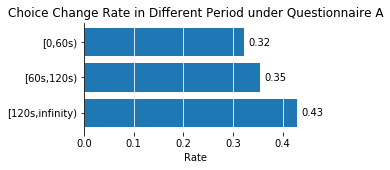

In [89]:
plt.figure(figsize=[4, 2])
plt.title("Choice Change Rate in Different Period under Questionnaire A")
plt.xlabel("Rate")
plt.grid(axis="x", c="w")
ax = plt.gca()
ax.spines["top"].set_visible(False)  # erase top frame
ax.spines["bottom"].set_visible(False)  # erase bottom frame
ax.spines["right"].set_visible(False)  # erase fight frame
for x, y in zip(
    [long_change_rate_mg, mid_change_rate_mg, short_change_rate_mg], [1, 2, 3]
):
    plt.text(x + 0.01, y - 1.1, "%.2f" % x)
plt.barh(
    ["[120s,infinity)", "[60s,120s)", "[0,60s)"],
    [long_change_rate_mg, mid_change_rate_mg, short_change_rate_mg],
)
top = max(long_change_rate_mg, mid_change_rate_mg, short_change_rate_mg)
ax.set_xticks(np.arange(0, top, 0.1))
#plt.savefig("Choice Change Rate in Different Period under Questionnaire A.png")
plt.show()

In [39]:
short_change_wb, short_keep_wb, mid_change_wb, mid_keep_wb, long_change_wb, long_keep_wb = (
    0,
    0,
    0,
    0,
    0,
    0,
)

for p, o, f in zip(df_wb["period"], df_wb["Q3"], df_wb["Q5"]):
    if p < 60 and o != f:
        short_change_wb += 1
    if p < 60 and o == f:
        short_keep_wb += 1
    if 60 <= p and p < 120 and o != f:
        mid_change_wb += 1
    if 60 <= p and p < 120 and o == f:
        mid_keep_wb += 1
    if 120 <= p and o != f:
        long_change_wb += 1
    if 120 <= p and o == f:
        long_keep_wb += 1

short_change_rate_wb = short_change_wb / (short_change_wb + short_keep_wb)
mid_change_rate_wb = mid_change_wb / (mid_change_wb + mid_keep_wb)
long_change_rate_wb = long_change_wb / (long_change_wb + long_keep_wb)

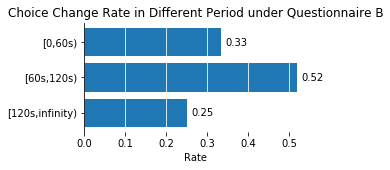

In [81]:
plt.figure(figsize=[4, 2])
plt.title("Choice Change Rate in Different Period under Questionnaire B")
plt.xlabel("Rate")
plt.grid(axis="x", c="w")
ax = plt.gca()
ax.spines["top"].set_visible(False)  # erase top frame
ax.spines["bottom"].set_visible(False)  # erase bottom frame
ax.spines["right"].set_visible(False)  # erase fight frame
for x, y in zip(
    [long_change_rate_wb, mid_change_rate_wb, short_change_rate_wb], [1, 2, 3]
):
    plt.text(x + 0.01, y - 1.1, "%.2f" % x)
plt.barh(
    ["[120s,infinity)", "[60s,120s)", "[0,60s)"],
    [long_change_rate_wb, mid_change_rate_wb, short_change_rate_wb],
)
top = max(long_change_rate_wb, mid_change_rate_wb, short_change_rate_wb)
ax.set_xticks(np.arange(0, top, 0.1))
plt.show()

## for H5: change rate with different self-evaluation

In [41]:
low_change_mg, low_keep_mg, soso_change_mg, soso_keep_mg, high_change_mg, high_keep_mg = (
    0,
    0,
    0,
    0,
    0,
    0,
)

for a, o, f in zip(df_mg["Q6"], df_mg["Q3"], df_mg["Q5"]):
    if 0 <= a and a < 3 and o != f:
        low_change_mg += 1
    if 0 <= a and a < 3 and o == f:
        low_keep_mg += 1
    if 3 <= a and a < 7 and o != f:
        soso_change_mg += 1
    if 3 <= a and a < 7 and o == f:
        soso_keep_mg += 1
    if 7 <= a and a <= 10 and o != f:
        high_change_mg += 1
    if 7 <= a and a <= 10 and o == f:
        high_keep_mg += 1

low_change_rate_mg = low_change_mg / (low_change_mg + low_keep_mg)
soso_change_rate_mg = soso_change_mg / (soso_change_mg + soso_keep_mg)
high_change_rate_mg = high_change_mg / (high_change_mg + high_keep_mg)

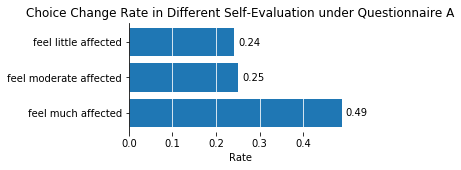

In [82]:
plt.figure(figsize=[4, 2])
plt.title("Choice Change Rate in Different Self-Evaluation under Questionnaire A")
plt.xlabel("Rate")
plt.grid(axis="x", c="w")
ax = plt.gca()
ax.spines["top"].set_visible(False)  # erase top frame
ax.spines["bottom"].set_visible(False)  # erase bottom frame
ax.spines["right"].set_visible(False)  # erase fight frame
for x, y in zip(
    [high_change_rate_mg, soso_change_rate_mg, low_change_rate_mg], [1, 2, 3]
):
    plt.text(x + 0.01, y - 1.1, "%.2f" % x)
plt.barh(
    ["feel much affected", "feel moderate affected", "feel little affected"],
    [high_change_rate_mg, soso_change_rate_mg, low_change_rate_mg],
)
top = max(high_change_rate_mg, soso_change_rate_mg, low_change_rate_mg)
ax.set_xticks(np.arange(0, top, 0.1))
plt.show()

In [43]:
low_change_wb, low_keep_wb, soso_change_wb, soso_keep_wb, high_change_wb, high_keep_wb = (
    0,
    0,
    0,
    0,
    0,
    0,
)

for a, o, f in zip(df_wb["Q6"], df_wb["Q3"], df_wb["Q5"]):
    if 0 <= a and a < 3 and o != f:
        low_change_wb += 1
    if 0 <= a and a < 3 and o == f:
        low_keep_wb += 1
    if 3 <= a and a < 7 and o != f:
        soso_change_wb += 1
    if 3 <= a and a < 7 and o == f:
        soso_keep_wb += 1
    if 7 <= a and a <= 10 and o != f:
        high_change_wb += 1
    if 7 <= a and a <= 10 and o == f:
        high_keep_wb += 1

low_change_rate_wb = low_change_wb / (low_change_wb + low_keep_wb)
soso_change_rate_wb = soso_change_wb / (soso_change_wb + soso_keep_wb)
high_change_rate_wb = high_change_wb / (high_change_wb + high_keep_wb)

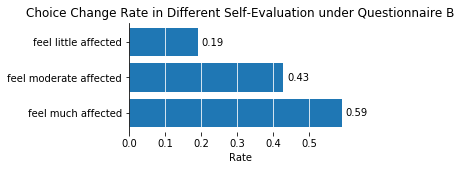

In [83]:
plt.figure(figsize=[4, 2])
plt.title("Choice Change Rate in Different Self-Evaluation under Questionnaire B")
plt.xlabel("Rate")
plt.grid(axis="x", c="w")
ax = plt.gca()
ax.spines["top"].set_visible(False)  # erase top frame
ax.spines["bottom"].set_visible(False)  # erase bottom frame
ax.spines["right"].set_visible(False)  # erase fight frame
for x, y in zip(
    [high_change_rate_wb, soso_change_rate_wb, low_change_rate_wb], [1, 2, 3]
):
    plt.text(x + 0.01, y - 1.1, "%.2f" % x)
plt.barh(
    ["feel much affected", "feel moderate affected", "feel little affected"],
    [high_change_rate_wb, soso_change_rate_wb, low_change_rate_wb],
)
top = max(high_change_rate_wb, soso_change_rate_wb, low_change_rate_wb)
ax.set_xticks(np.arange(0, top, 0.1))
plt.show()